# Churn Prediction For Bank Customer

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Indest Data

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


- Loan tenure means the length of time that will be taken by the borrower to repay the loan along with the interest.

In [6]:
df.drop(["RowNumber","CustomerId", "Surname"], inplace=True, axis=1)

In [7]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

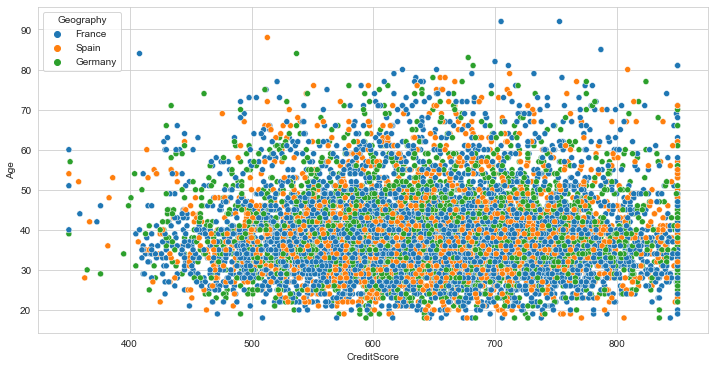

In [8]:
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="Geography");

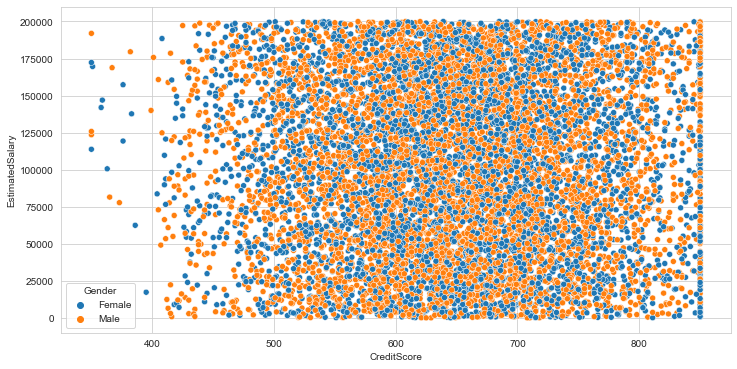

In [9]:
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary", hue="Gender");

In [10]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
df1 = pd.get_dummies(data=df,drop_first=True)

In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000
Geography_Germany,10000.000,0.251,0.434,0.000,0.000,0.000,1.000,1.000


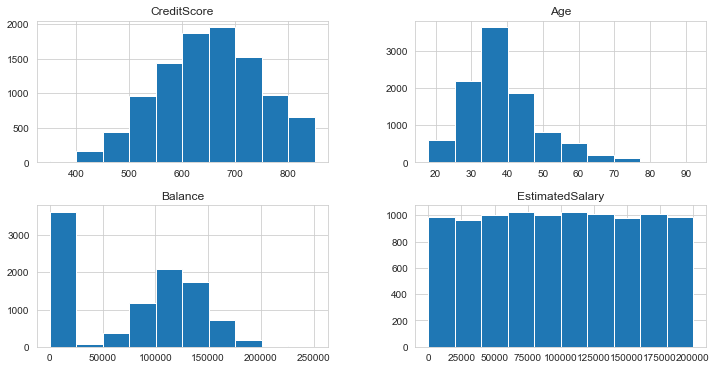

In [14]:
df1.hist(["CreditScore","Age", "Balance", "EstimatedSalary"]);

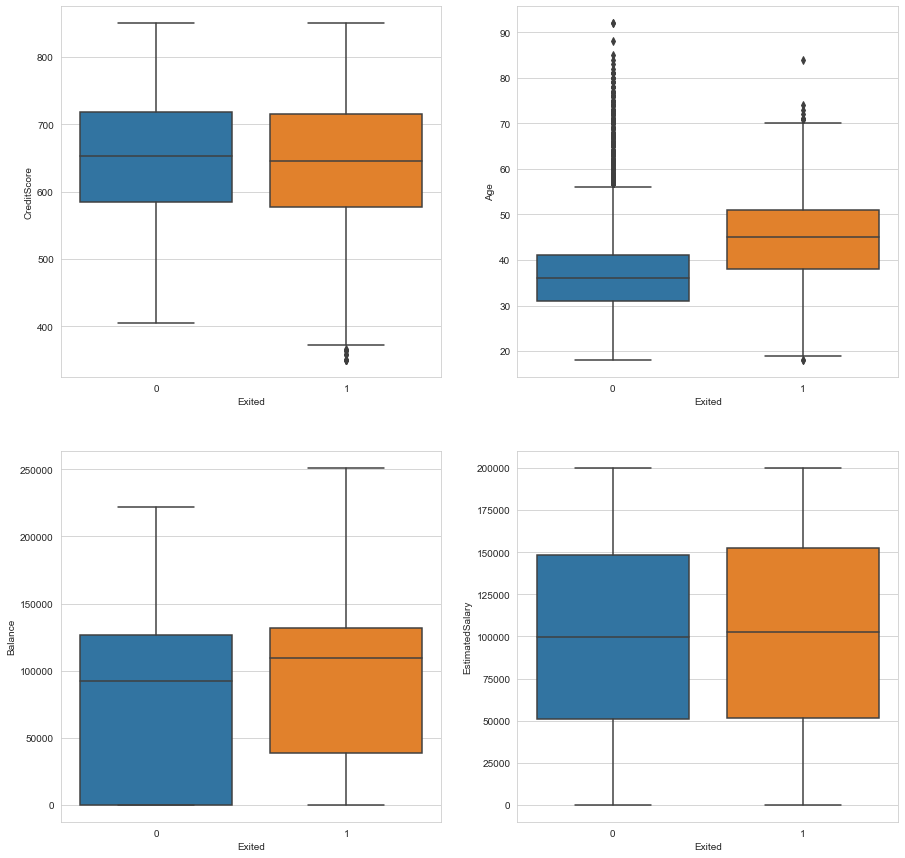

In [15]:
df2 = df1[["CreditScore","Age", "Balance", "EstimatedSalary", "Exited"]]
index = 0
plt.figure(figsize=(15,15))
for feature in df2.columns:
    if feature != "Exited":
        index += 1
        plt.subplot(2,2,index)
        sns.boxplot(x="Exited", y=feature, data=df2);

<AxesSubplot:>

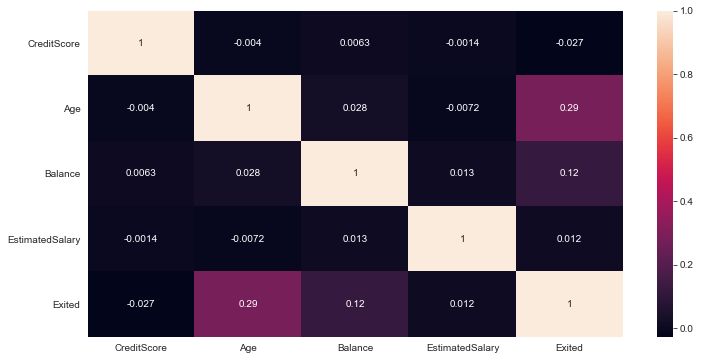

In [16]:
sns.heatmap(data=df2.corr(), annot=True)

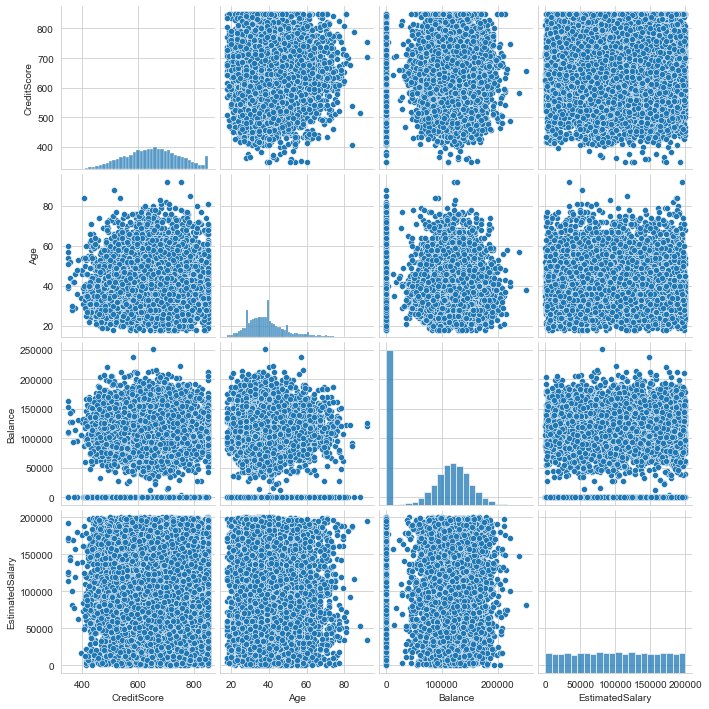

In [17]:
sns.pairplot(data=df1[["CreditScore","Age", "Balance", "EstimatedSalary"]]);

## Preprocessing of Data
- Train | Test Split, Scalling

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [124]:
X = df1.drop("Exited", axis=1)
y = df1["Exited"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
print("Train Data : ", X_train.shape[0])
print("Test Data  : ", X_test.shape[0])

Train Data :  8000
Test Data  :  2000


In [127]:
y_train.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

In [128]:
y_test.value_counts()

0    1607
1     393
Name: Exited, dtype: int64

In [129]:
scaler = MinMaxScaler()

In [130]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, roc_auc_score, roc_curve

### Creating Model

### without class_weigth

In [132]:
model_1 = Sequential()

model_1.add(Dense(32, activation="relu"))
model_1.add(Dense(32, activation="relu"))
model_1.add(Dense(1, activation="sigmoid"))

model_1.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [133]:
model_1.fit(x = X_train, y = y_train, batch_size=20, epochs=200, validation_split=0.25, verbose=1, )

Epoch 1/200
300/300 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7682 - val_loss: 0.4600 - val_accuracy: 0.7985
Epoch 2/200
300/300 [==============================] - 0s 830us/step - loss: 0.4606 - accuracy: 0.7998 - val_loss: 0.4474 - val_accuracy: 0.8025
Epoch 3/200
300/300 [==============================] - 0s 833us/step - loss: 0.4449 - accuracy: 0.8083 - val_loss: 0.4301 - val_accuracy: 0.8200
Epoch 4/200
300/300 [==============================] - 0s 849us/step - loss: 0.4308 - accuracy: 0.8108 - val_loss: 0.4124 - val_accuracy: 0.8225
Epoch 5/200
300/300 [==============================] - 0s 861us/step - loss: 0.4061 - accuracy: 0.8232 - val_loss: 0.4029 - val_accuracy: 0.8315
Epoch 6/200
300/300 [==============================] - 0s 812us/step - loss: 0.3816 - accuracy: 0.8412 - val_loss: 0.3799 - val_accuracy: 0.8455
Epoch 7/200
300/300 [==============================] - 0s 846us/step - loss: 0.3688 - accuracy: 0.8462 - val_loss: 0.3845 - val_accu

In [134]:
model_1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (20, 32)                  384       
_________________________________________________________________
dense_50 (Dense)             (20, 32)                  1056      
_________________________________________________________________
dense_51 (Dense)             (20, 1)                   33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [135]:
pd.DataFrame(model_1.history.history).describe().T

,count,mean,std,min,25%,50%,75%,max
loss,200.000,0.313,0.030,0.284,0.293,0.307,0.324,0.506
accuracy,200.000,0.869,0.014,0.768,0.866,0.873,0.877,0.882
val_loss,200.000,0.366,0.015,0.349,0.355,0.360,0.374,0.460
val_accuracy,200.000,0.850,0.008,0.799,0.847,0.851,0.854,0.859


<AxesSubplot:>

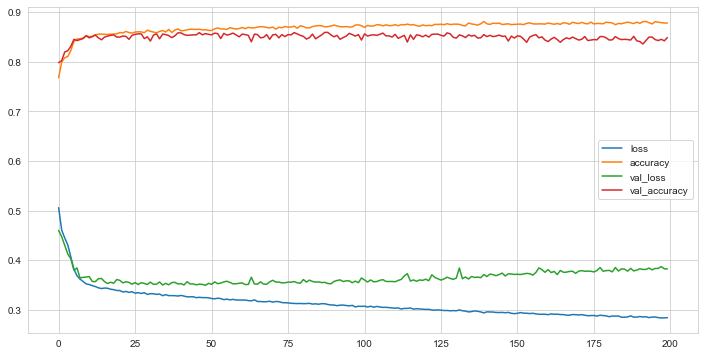

In [136]:
pd.DataFrame(model_1.history.history).plot()

In [137]:
loss, accuracy = model_1.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.36387714743614197
accuracy :  0.8550000190734863


#### Evaluate

In [138]:
loss, accuracy = model_1.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.36387714743614197
accuracy :  0.8550000190734863


In [139]:
y_pred = (model_1.predict(X_test)> 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1515   92]
 [ 198  195]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.50      0.57       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000



### adding dropout to same model

In [140]:
from tensorflow.keras.layers import Dropout

In [141]:
model_1 = Sequential()

model_1.add(Dense(32, activation="relu"))
model_1.add(Dropout(0.5))
model_1.add(Dense(32, activation="relu"))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation="sigmoid"))

model_1.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [142]:
model_1.fit(x = X_train, y = y_train, batch_size=20, epochs=200, validation_split=0.25, verbose=1, )

Epoch 1/200
300/300 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7868 - val_loss: 0.4704 - val_accuracy: 0.7950
Epoch 2/200
300/300 [==============================] - 0s 915us/step - loss: 0.4970 - accuracy: 0.7953 - val_loss: 0.4596 - val_accuracy: 0.7950
Epoch 3/200
300/300 [==============================] - 0s 878us/step - loss: 0.4829 - accuracy: 0.7937 - val_loss: 0.4519 - val_accuracy: 0.7950
Epoch 4/200
300/300 [==============================] - 0s 897us/step - loss: 0.4735 - accuracy: 0.7968 - val_loss: 0.4468 - val_accuracy: 0.7975
Epoch 5/200
300/300 [==============================] - 0s 898us/step - loss: 0.4680 - accuracy: 0.8003 - val_loss: 0.4416 - val_accuracy: 0.7985
Epoch 6/200
300/300 [==============================] - 0s 881us/step - loss: 0.4663 - accuracy: 0.8018 - val_loss: 0.4346 - val_accuracy: 0.8015
Epoch 7/200
300/300 [==============================] - 0s 882us/step - loss: 0.4583 - accuracy: 0.8040 - val_loss: 0.4288 - val_accu

<AxesSubplot:>

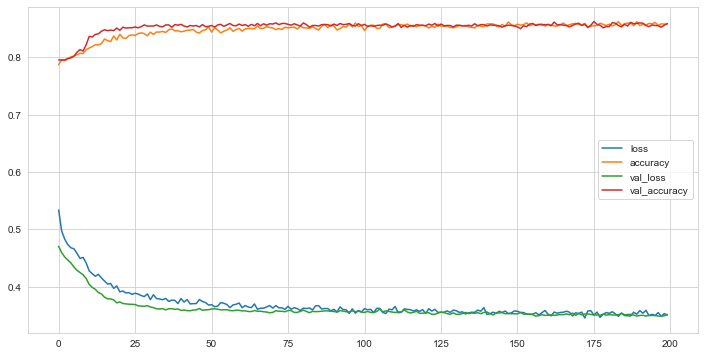

In [143]:
pd.DataFrame(model_1.history.history).plot()

In [144]:
y_pred = (model_1.predict(X_test)> 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1560   47]
 [ 232  161]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.41      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



### without dropout

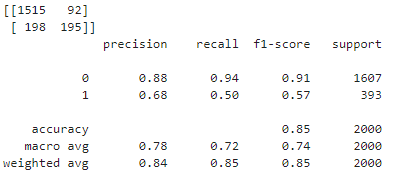

### New Model (model_2)

In [145]:
model_2 = Sequential()

model_2.add(Dense(32, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [146]:
model_2.fit(x = X_train, y = y_train, batch_size=32, epochs=200, validation_split=0.25, verbose=1)

Epoch 1/200
188/188 [==============================] - 1s 1ms/step - loss: 0.5694 - accuracy: 0.7397 - val_loss: 0.4893 - val_accuracy: 0.7950
Epoch 2/200
188/188 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7930 - val_loss: 0.4741 - val_accuracy: 0.7950
Epoch 3/200
188/188 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7943 - val_loss: 0.4654 - val_accuracy: 0.7950
Epoch 4/200
188/188 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.7950 - val_loss: 0.4596 - val_accuracy: 0.7950
Epoch 5/200
188/188 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7947 - val_loss: 0.4532 - val_accuracy: 0.7950
Epoch 6/200
188/188 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.7930 - val_loss: 0.4493 - val_accuracy: 0.7950
Epoch 7/200
188/188 [==============================] - 0s 999us/step - loss: 0.4722 - accuracy: 0.7947 - val_loss: 0.4443 - val_accuracy: 0.79

In [147]:
model_2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 32)                384       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

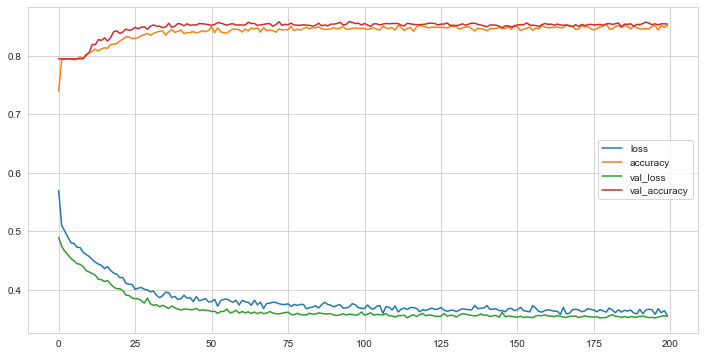

In [148]:
pd.DataFrame(model_2.history.history).plot()

In [149]:
loss, accuracy = model_2.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33659523725509644
accuracy :  0.8539999723434448


In [150]:
y_pred = (model_2.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1563   44]
 [ 248  145]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.77      0.37      0.50       393

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000



### batch_size : 16

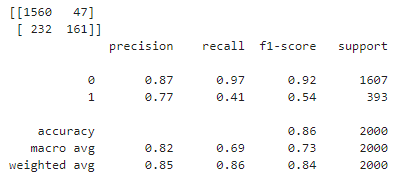

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [151]:
from sklearn.utils import class_weight

In [152]:
y_train.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

In [159]:
class_weights = {0 : 0.31, 1 : 0.69}

In [160]:
model_3 = Sequential()

model_3.add(Dense(32, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(32, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation="sigmoid"))

model_3.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [161]:
model_3.fit(x = X_train, y = y_train, batch_size=16, epochs=200,
            validation_split = 0.25,
            class_weight=class_weights, verbose=1)

Epoch 1/200
375/375 [==============================] - 1s 1ms/step - loss: 0.2527 - accuracy: 0.7530 - val_loss: 0.5384 - val_accuracy: 0.8010
Epoch 2/200
375/375 [==============================] - 0s 924us/step - loss: 0.2432 - accuracy: 0.7560 - val_loss: 0.5214 - val_accuracy: 0.8015
Epoch 3/200
375/375 [==============================] - 0s 914us/step - loss: 0.2391 - accuracy: 0.7693 - val_loss: 0.5491 - val_accuracy: 0.7630
Epoch 4/200
375/375 [==============================] - 0s 992us/step - loss: 0.2372 - accuracy: 0.7597 - val_loss: 0.5107 - val_accuracy: 0.7960
Epoch 5/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2348 - accuracy: 0.7597 - val_loss: 0.5061 - val_accuracy: 0.8030
Epoch 6/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2295 - accuracy: 0.7738 - val_loss: 0.4914 - val_accuracy: 0.8070
Epoch 7/200
375/375 [==============================] - 0s 920us/step - loss: 0.2277 - accuracy: 0.7745 - val_loss: 0.4813 - val_accuracy

#### Evaluate

<AxesSubplot:>

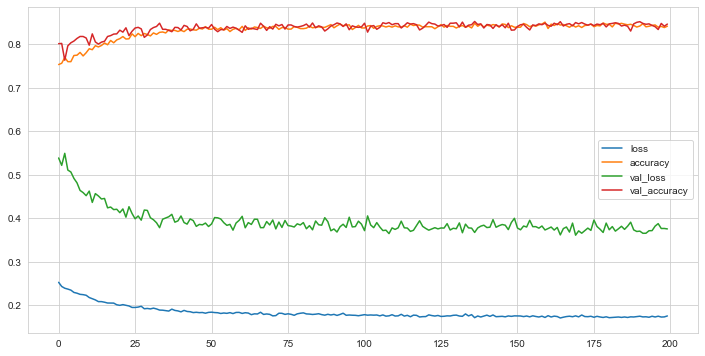

In [162]:
pd.DataFrame(model_3.history.history).plot()

In [163]:
y_pred = (model_3.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1485  122]
 [ 165  228]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.65      0.58      0.61       393

    accuracy                           0.86      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000



### Results for different models

- 0: 0.31 , 1: 0.69  epoch : 100


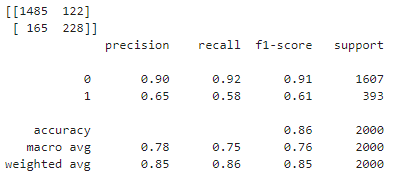

- 0: 0.21 , 1: 0.79  epoch : 200

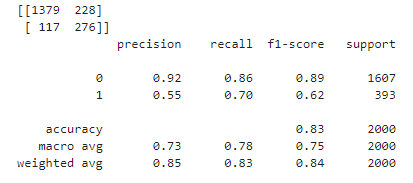       

## GridSearchCV

In [164]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [165]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [166]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 15)

In [167]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200, validation_split = 0.25)
parameters = {'batch_size': [8, 16, 24],
              'optimizer': ['adam', 'rmsprop', "SGD"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Epoch 1/200
750/750 [==============================] - 1s 927us/step - loss: 0.5296 - accuracy: 0.7802 - val_loss: 0.4694 - val_accuracy: 0.7950
Epoch 2/200
750/750 [==============================] - 1s 804us/step - loss: 0.4925 - accuracy: 0.7965 - val_loss: 0.4593 - val_accuracy: 0.7950
Epoch 3/200
750/750 [==============================] - 1s 802us/step - loss: 0.4818 - accuracy: 0.7937 - val_loss: 0.4476 - val_accuracy: 0.7950
Epoch 4/200
750/750 [==============================] - 1s 793us/step - loss: 0.4706 - accuracy: 0.7980 - val_loss: 0.4378 - val_accuracy: 0.7950
Epoch 5/200
750/750 [==============================] - 1s 791us/step - loss: 0.4585 - accuracy: 0.8015 - val_loss: 0.4270 - val_accuracy: 0.8080
Epoch 6/200
750/750 [==============================] - 1s 807us/step - loss: 0.4439 - accuracy: 0.8102 - val_loss: 0.4093 - val_accuracy: 0.8255
Epoch 7/200
750/750 [==============================] - 1s 803us/step 

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021C4074BB20>,
             n_jobs=-1,
             param_grid={'batch_size': [8, 16, 24],
                         'optimizer': ['adam', 'rmsprop', 'SGD']},
             scoring='accuracy', verbose=1)

#### Evaluate

In [168]:
grid_model.best_score_

0.8564999999999999

In [169]:
grid_model.best_params_

{'batch_size': 8, 'optimizer': 'adam'}

## Final Model and Model Deployment

In [170]:
from tensorflow.keras.layers import Dropout

In [172]:
final_model = Sequential()

final_model.add(Dense(32, activation="relu"))
final_model.add(Dropout(0.5))
final_model.add(Dense(32, activation="relu"))
final_model.add(Dropout(0.5))
final_model.add(Dense(1, activation="sigmoid"))

final_model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 15)

In [173]:
final_model.fit(x=X_train, y=y_train, batch_size=8, epochs=100, validation_data=(X_test, y_test), callbacks=early_stop, verbose=1)

Epoch 1/100
1000/1000 [==============================] - 1s 881us/step - loss: 0.5217 - accuracy: 0.7884 - val_loss: 0.4648 - val_accuracy: 0.8035
Epoch 2/100
1000/1000 [==============================] - 1s 799us/step - loss: 0.4862 - accuracy: 0.7951 - val_loss: 0.4450 - val_accuracy: 0.8035
Epoch 3/100
1000/1000 [==============================] - 1s 810us/step - loss: 0.4707 - accuracy: 0.7979 - val_loss: 0.4366 - val_accuracy: 0.8095
Epoch 4/100
1000/1000 [==============================] - 1s 789us/step - loss: 0.4564 - accuracy: 0.8014 - val_loss: 0.4162 - val_accuracy: 0.8245
Epoch 5/100
1000/1000 [==============================] - 1s 779us/step - loss: 0.4469 - accuracy: 0.8081 - val_loss: 0.4005 - val_accuracy: 0.8325
Epoch 6/100
1000/1000 [==============================] - 1s 786us/step - loss: 0.4330 - accuracy: 0.8151 - val_loss: 0.3940 - val_accuracy: 0.8435
Epoch 7/100
1000/1000 [==============================] - 1s 796us/step - loss: 0.4231 - accuracy: 0.8190 - val_loss: 0

<AxesSubplot:>

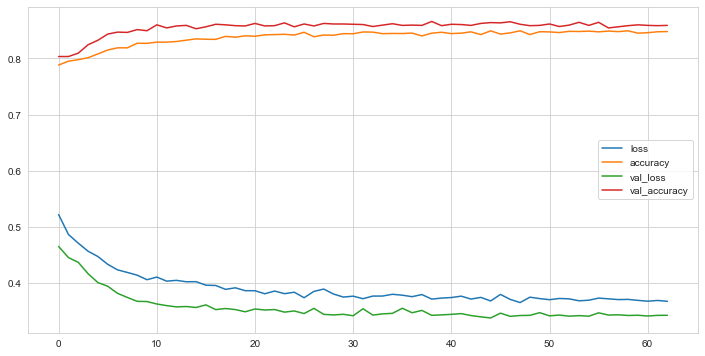

In [174]:
pd.DataFrame(final_model.history.history).plot()

In [175]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1545   62]
 [ 220  173]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



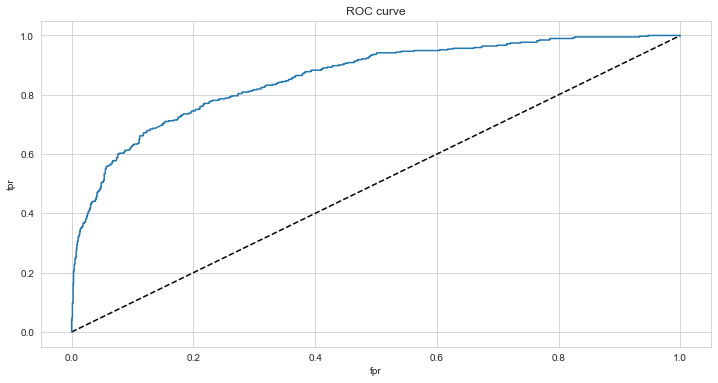

In [176]:
y_pred_proba = final_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [177]:
roc_auc_score(y_test, y_pred_proba)

0.8587477495879193

### Prediction

In [178]:
client = df1.drop("Exited",axis=1).iloc[:10, :]
client

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,1,0
5,645,44,8,113755.780,2,1,0,149756.710,0,1,1
6,822,50,7,0.000,2,1,1,10062.800,0,0,1
7,376,29,4,115046.740,4,1,0,119346.880,1,0,0
8,501,44,4,142051.070,2,0,1,74940.500,0,0,1
9,684,27,2,134603.880,1,1,1,71725.730,0,0,1


In [179]:
client = scaler.transform(client)
pd.DataFrame(client, columns=df1.drop("Exited",axis=1).columns)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324,0.200,0.000,0.000,1.000,1.000,0.507,0.000,0.000,0.000
1,0.516,0.311,0.100,0.334,0.000,0.000,1.000,0.563,0.000,1.000,0.000
2,0.304,0.324,0.800,0.636,0.667,1.000,0.000,0.570,0.000,0.000,0.000
3,0.698,0.284,0.100,0.000,0.333,0.000,0.000,0.469,0.000,0.000,0.000
4,1.000,0.338,0.200,0.500,0.000,1.000,1.000,0.395,0.000,1.000,0.000
5,0.590,0.351,0.800,0.453,0.333,1.000,0.000,0.749,0.000,1.000,1.000
6,0.944,0.432,0.700,0.000,0.333,1.000,1.000,0.050,0.000,0.000,1.000
7,0.052,0.149,0.400,0.459,1.000,1.000,0.000,0.597,1.000,0.000,0.000
8,0.302,0.351,0.400,0.566,0.333,0.000,1.000,0.374,0.000,0.000,1.000
9,0.668,0.122,0.200,0.536,0.000,1.000,1.000,0.358,0.000,0.000,1.000


In [180]:
predict_client = (final_model.predict(client, verbose=1) > 0.5).astype("int32")

1/1 [==============================] - 0s 13ms/step


In [181]:
print(confusion_matrix(df1["Exited"][:10], predict_client))
print(classification_report(df1["Exited"][:10], predict_client))

[[6 0]
 [2 2]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.50      0.67         4

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10

